In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rc('font', size=16)
mpl.rc('font',family='sans-serif', serif='Sans')
mpl.rc('figure', facecolor='white')

In [2]:
def count_elements(n, atol=1e-10):
    x0 = 10.0
    dx = 2*x0/n
    z = 2.0
    x = np.linspace(-x0, x0, n)
    alpha = 1.0
    beta = 1.1
    m = 1.0
    def oe_kinetic(i, j) :
        if (i==j): 
            t_ij =  (-1)**(i-i) * (1.0 / (2.0 * m * dx**2)) * np.pi**2 / 3.0
        else:
            t_ij = (-1)**abs(i-j) * (1.0 / (2.0 * m * dx**2)) * 2.0 / (i-j)**2
        return(t_ij)

    def oe_sc_single_well(i, j) :
        if (i==j):
            v_ij = -z/np.sqrt(x[i-1]**2 + alpha)
        else: 
            v_ij = 0.0
        return(v_ij)

    def te_kinetic(u, v) :
        i = int((u-1)/n)+1
        j = int((v-1)/n)+1
        k = ((u-1)%n)+1
        l = ((v-1)%n)+1
        t_uv = 0.0
        if (k==l):
            t_uv += oe_kinetic(i,j) 
        if (i==j):
            t_uv += oe_kinetic(k,l)
        return(t_uv)

    def te_sc_single_well(u, v) :
        if (u == v):
            i = int((u-1)/n)+1
            j = ((u-1)%n)+1
            v_uv = oe_sc_single_well(i, i) + oe_sc_single_well(j, j)
            v_uv = v_uv + ((1.0)/np.sqrt(beta + (x[i-1]-x[j-1])**2))
        else:
            v_uv = 0.0
        return(v_uv)
    nnz = 0
    h = np.zeros((n**2,n**2)) 
    for i in range(n**2):
        hij = te_kinetic(i+1,i+1) + te_sc_single_well(i+1,i+1)
        h[i,i] = hij
        if (abs(hij)>atol):
            nnz += 1
        for j in range(i+1,n**2):
            hij = te_kinetic(i+1,j+1)
            h[i,j] = hij
            h[j,i] = h[i,j]
            if (abs(hij)>atol):
                nnz += 2
    return nnz, h

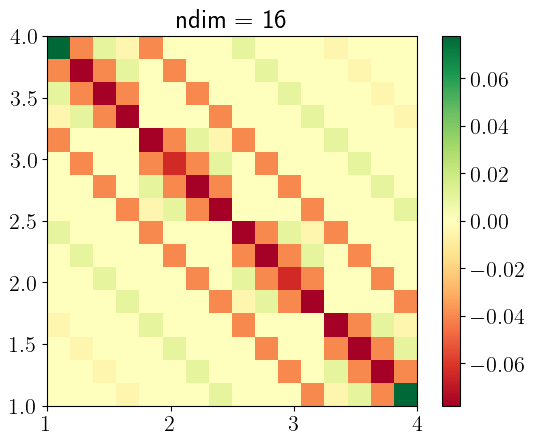

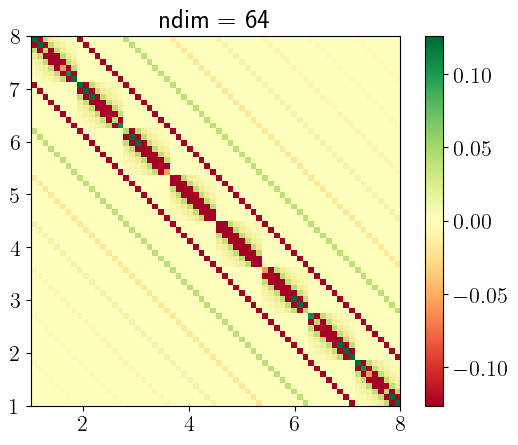

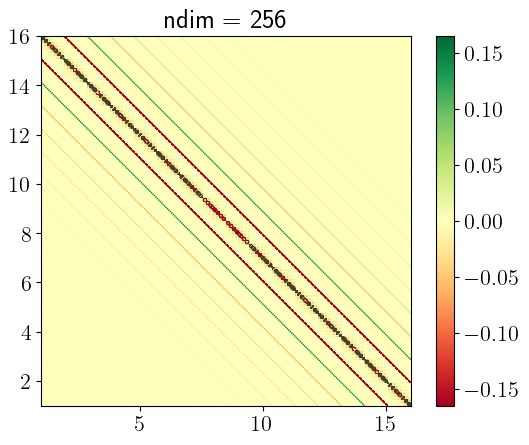

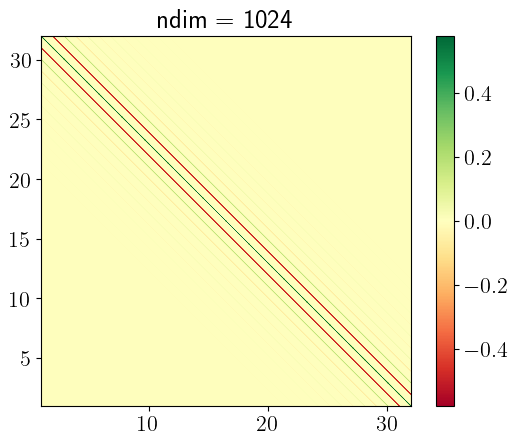

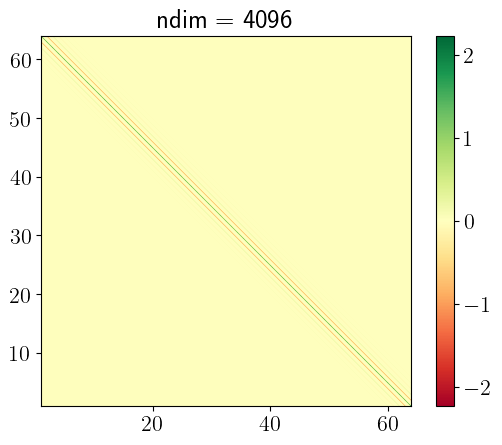

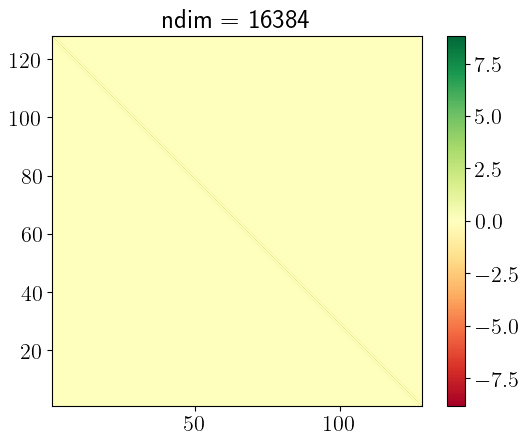

In [3]:
num = np.array([4,8,16,32,64,128])
nnz_elem16 = []
atol =1e-16

for ni in num:
    nnz, h = count_elements(ni, atol)
    nnz_elem16.append(nnz)
    h_mean = 0.1*(abs(np.max(h)) + abs(np.min(h)))/2
    fig = plt.figure()
    plt.imshow(h, cmap='RdYlGn', 
               vmin=-h_mean, vmax=h_mean, 
               extent=[1,ni,1,ni])
    plt.colorbar()
    plt.title('ndim = %i'%ni**2)
    plt.show()
    fig.savefig('plots/ndim_%i_atol_1e-16.png'%ni**2, dpi=200)

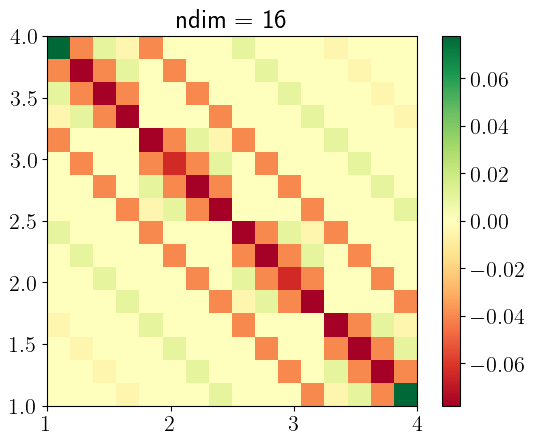

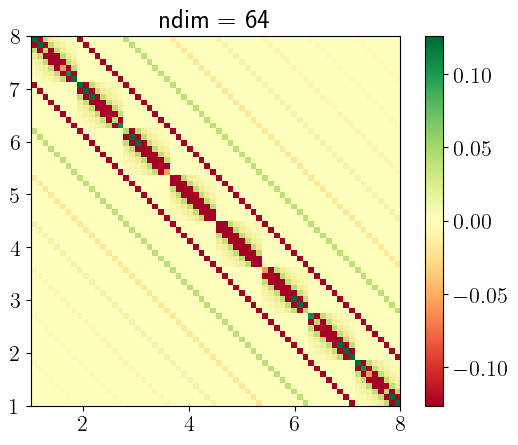

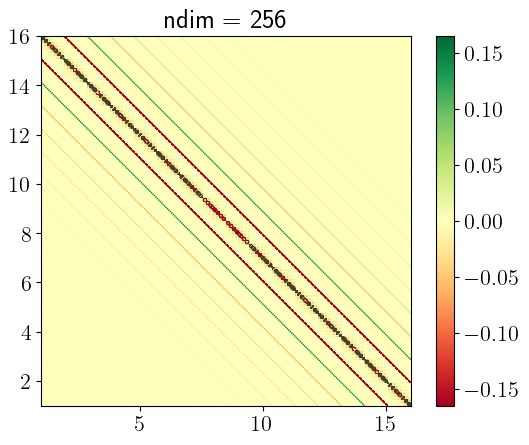

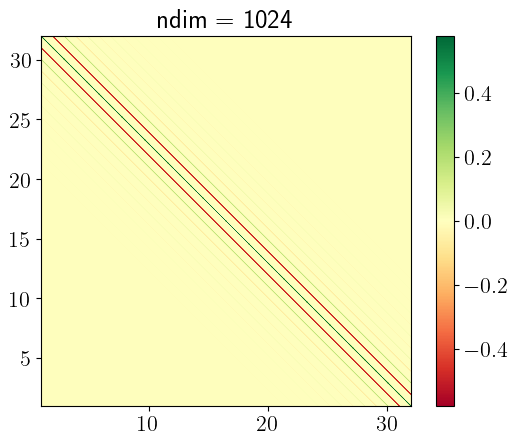

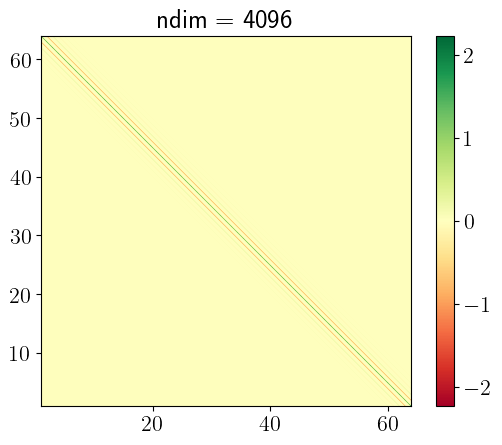

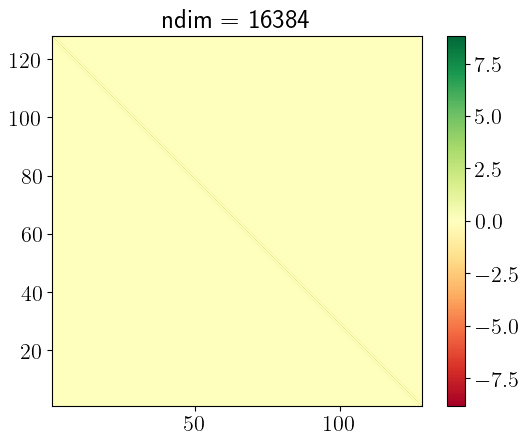

In [4]:
num = np.array([4,8,16,32,64,128])
nnz_elem12 = []
atol =1e-12

for ni in num:
    nnz, h = count_elements(ni, atol)
    nnz_elem12.append(nnz)
    h_mean = 0.1*(abs(np.max(h)) + abs(np.min(h)))/2
    fig = plt.figure()
    plt.imshow(h, cmap='RdYlGn', 
               vmin=-h_mean, vmax=h_mean, 
               extent=[1,ni,1,ni])
    plt.colorbar()
    plt.title('ndim = %i'%ni**2)
    plt.show()
    fig.savefig('plots/ndim_%i_atol_1e-12.png'%ni**2, dpi=200)

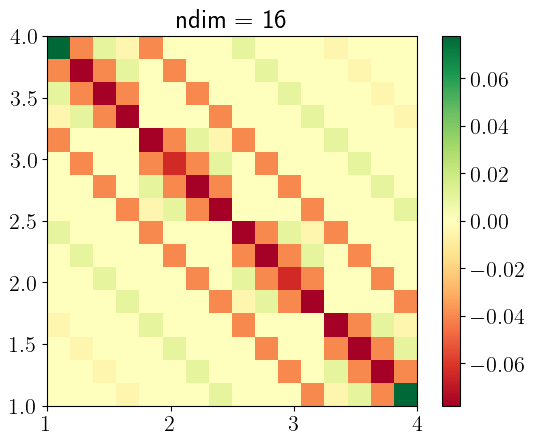

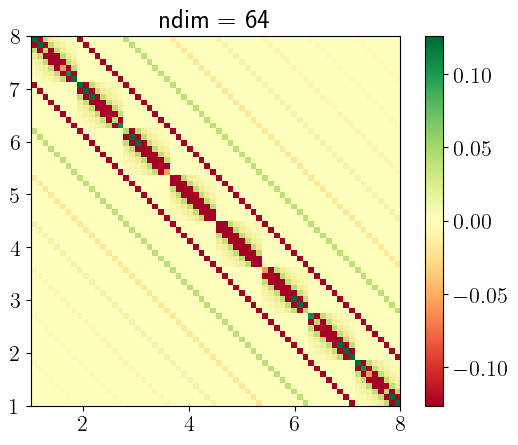

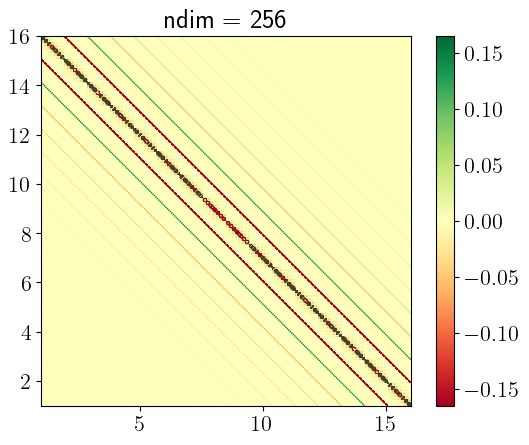

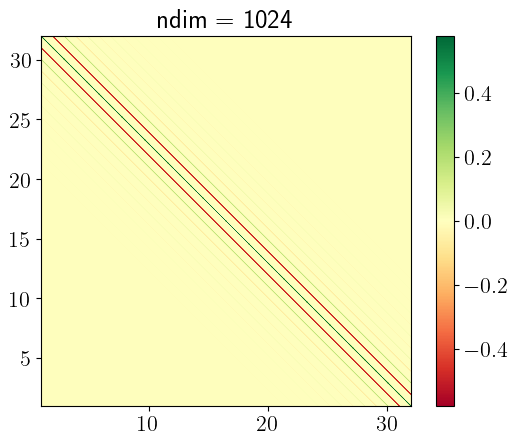

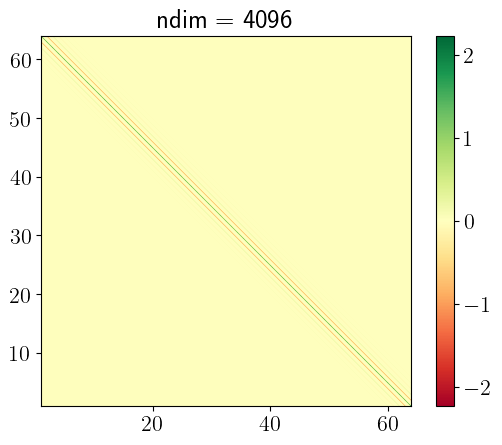

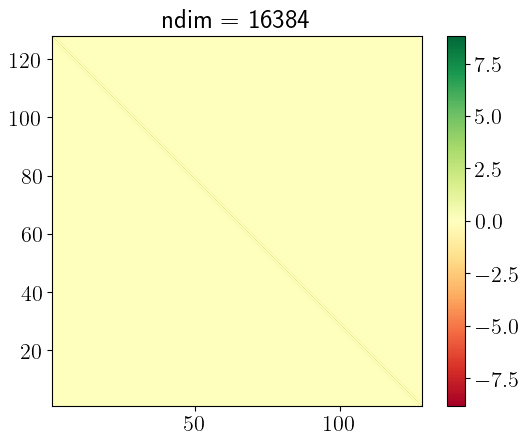

In [5]:
num = np.array([4,8,16,32,64,128])
nnz_elem8 = []
atol =1e-8

for ni in num:
    nnz, h = count_elements(ni, atol)
    nnz_elem8.append(nnz)
    h_mean = 0.1*(abs(np.max(h)) + abs(np.min(h)))/2
    fig = plt.figure()
    plt.imshow(h, cmap='RdYlGn', 
               vmin=-h_mean, vmax=h_mean, 
               extent=[1,ni,1,ni])
    plt.colorbar()
    plt.title('ndim = %i'%ni**2)
    plt.show()
    fig.savefig('plots/ndim_%i_atol_1e-8.png'%ni**2, dpi=200)

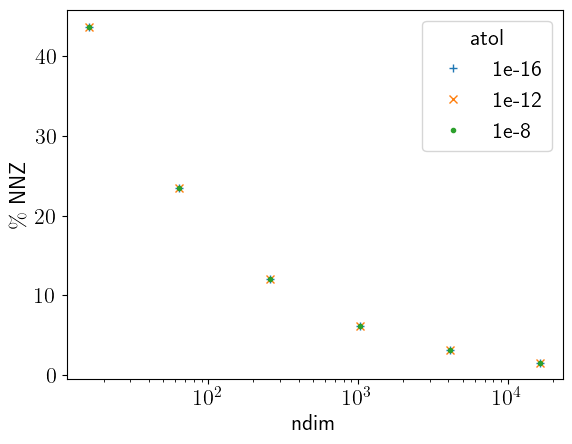

In [10]:
plt.plot(num**2, 100*(np.array(nnz_elem16)/(num**4)),'+',label='1e-16')
plt.plot(num**2, 100*(np.array(nnz_elem12)/(num**4)),'x',label='1e-12')
plt.plot(num**2, 100*(np.array(nnz_elem8)/(num**4)),'.',label='1e-8')

plt.legend(title='atol')
plt.xlabel('ndim')
plt.ylabel(r'$\%$ NNZ')
plt.xscale('log')
# plt.xlim(1e1,2e4)
# plt.ylim(0,15)

Text(0.5, 0, 'ndim')

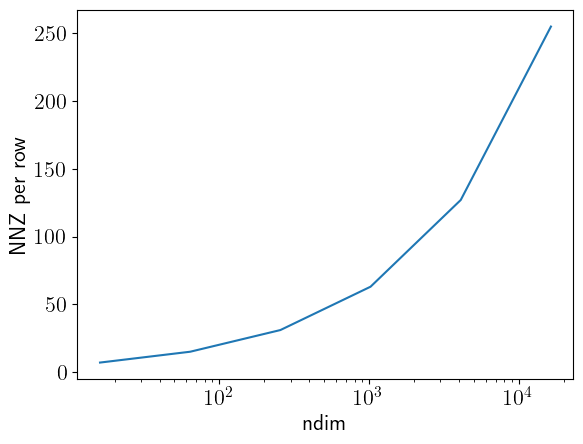

In [13]:
plt.plot(num**2, np.array(nnz_elem8/num**2, dtype=np.int32))
plt.ylabel('NNZ per row')
plt.xscale('log')
plt.xlabel('ndim')

In [16]:
nnz_per_row = np.array(nnz_elem8/num**2, dtype=np.int32)
for i in range(len(num)):
    print('%i,\t %i, \t %3.0f'%(num[i], int(nnz_elem8[i]/num[i]**2), 100*nnz_elem8[i]/num[i]**4))

4,	 7, 	  44
8,	 15, 	  23
16,	 31, 	  12
32,	 63, 	   6
64,	 127, 	   3
128,	 255, 	   2


960